<a href="https://colab.research.google.com/github/ewattudo/gis/blob/main/PS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 1 - Erick Watt-Udogu


# Setup and Upload files
Run this for data and setup code.

In [ ]:
!pip install geopandas==1.0.1
import pandas as pd
import urllib.request

In [ ]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [ ]:
#!python --version
gpd.__version__

'1.0.1'

In [ ]:
!pip install mapclassify
import mapclassify #need for thematic map classification

## Undergrad Student Data

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/gis/main/UG%20States.csv", "UGStates.csv")

('UGStates.csv', <http.client.HTTPMessage at 0x7bf4b36a6680>)

In [ ]:
#ran into an issue creating this dataframe and used the embedded help.
UGS = pd.read_csv('UGStates.csv')

Grad Application Data

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/gis/main/Grad%20Apps%20World.csv", "GradWorld.csv")
GW = pd.read_csv('GradWorld.csv')

('GradWorld.csv', <http.client.HTTPMessage at 0x7bf4ac06a9b0>)

In [ ]:
! wget -q -O NJC.zip https://github.com/ewattudo/gis/raw/main/NJ_Municipal_Boundaries_3424_-8497422634937852328.zip
#The URL was changed to download the raw file.

zip_ref = zipfile.ZipFile('NJC.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

In [ ]:
NJC=gpd.read_file('NJ_Municipal_Boundaries_3424.shp')

/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:196: RuntimeWarning: NJ_Municipal_Boundaries_3424.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


<Axes: >

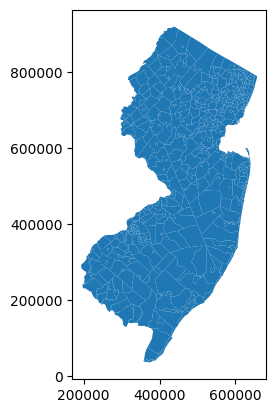

In [ ]:
NJC.plot()

In [ ]:
NJC.head()

,MUN,COUNTY,MUN_LABEL,MUN_TYPE,NAME,GNIS_NAME,GNIS,SSN,MUN_CODE,CENSUS2020,...,POP2010,POP2000,POP1990,POP1980,POPDEN2020,POPDEN2010,POPDEN2000,POPDEN1990,POPDEN1980,geometry
0,CAPE MAY POINT BORO,CAPE MAY,Cape May Point Borough,Borough,Cape May Point Borough,Borough of Cape May Point,885179,0503,0503,3400910330,...,291,241,248,255,803,970,803,826,850,"POLYGON ((361324.555 36119.591, 361262.564 361..."
1,WEST CAPE MAY BORO,CAPE MAY,West Cape May Borough,Borough,West Cape May Borough,Borough of West Cape May,885435,0512,0512,3400978530,...,1024,1095,1026,1091,926,866,926,868,923,"POLYGON ((371013.281 40519.688, 372330.802 395..."
2,CAPE MAY CITY,CAPE MAY,Cape May City,City,Cape May,City of Cape May,885178,0502,0502,3400910270,...,3607,4034,4668,4853,1399,1251,1399,1619,1684,"POLYGON ((385059.21 43411.44, 385027.479 43423..."
3,WILDWOOD CREST BORO,CAPE MAY,Wildwood Crest Borough,Borough,Wildwood Crest Borough,Borough of Wildwood Crest,885445,0515,0515,3400981200,...,3270,3980,3631,4149,2688,2208,2688,2452,2802,"POLYGON ((397386.178 55797.446, 397386.526 557..."
4,WEST WILDWOOD BORO,CAPE MAY,West Wildwood Borough,Borough,West Wildwood Borough,Borough of West Wildwood,885441,0513,0513,3400980210,...,603,448,453,360,1231,1657,1231,1245,990,"POLYGON ((401502.81 61708.99, 401592.22 61615...."


In [ ]:
print(NJC.columns)

Index(['MUN', 'COUNTY', 'MUN_LABEL', 'MUN_TYPE', 'NAME', 'GNIS_NAME', 'GNIS',
       'SSN', 'MUN_CODE', 'CENSUS2020', 'ACRES', 'SQ_MILES', 'POP2020',
       'POP2010', 'POP2000', 'POP1990', 'POP1980', 'POPDEN2020', 'POPDEN2010',
       'POPDEN2000', 'POPDEN1990', 'POPDEN1980', 'geometry'],
      dtype='object')


In [ ]:
print(NJC.MUN_LABEL.unique())

['Cape May Point Borough' 'West Cape May Borough' 'Cape May City'
 'Wildwood Crest Borough' 'West Wildwood Borough' 'North Wildwood City'
 'Lower Township' 'Stone Harbor Borough' 'Avalon Borough'
 'Middle Township' 'Sea Isle City' 'Woodbine Borough' 'Dennis Township'
 'Ocean City' 'Longport Borough' 'Upper Township' 'Corbin City'
 'Somers Point City' 'Margate City' 'Commercial Township' 'Downe Township'
 'Ventnor City' 'Linwood City' 'Northfield City' 'Lawrence Township'
 'Atlantic City' 'Greenwich Township' 'Weymouth Township'
 'Estell Manor City' 'Millville City' 'Brigantine City' 'Bridgeton City'
 'Shiloh Borough' 'Deerfield Township' 'Hopewell Township' 'Buena Borough'
 'Port Republic City' 'Lower Alloways Creek Township'
 'Upper Deerfield Township' 'Vineland City' 'Elsinboro Township'
 'Quinton Township' 'Beach Haven Borough' 'Salem City' 'Hamilton Township'
 'Buena Vista Township' 'Elmer Borough' 'Alloway Township'
 'Tuckerton Borough' 'Folsom Borough' 'Ship Bottom Borough'
 'Woo

In [ ]:
#After a lot of mapping, of the data I had with the the list above, I have this final list. GIGO!
#I keep running into issues when I try to use old code to download CSV files. I had to get Gemini help again.
# Download the raw CSV data
!wget 'https://raw.githubusercontent.com/ewattudo/gis/main/UG%20NJ%20Cities.csv' -O UGNJCities.csv

#Read the downloaded CSV file using pandas
UGNJC = pd.read_csv('UGNJCities.csv')

--2024-09-26 01:09:36--  https://raw.githubusercontent.com/ewattudo/gis/main/UG%20NJ%20Cities.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4798 (4.7K) [text/plain]
Saving to: ‘UGNJCities.csv’

UGNJCities.csv      100%[===================>]   4.69K  --.-KB/s    in 0s      

2024-09-26 01:09:37 (41.1 MB/s) - ‘UGNJCities.csv’ saved [4798/4798]



In [ ]:
#After a lot of mapping, of the data I had with the the list above, I have this final list. GIGO!
#I keep running into issues when I try to use old code to download CSV files. I had to get Gemini help again.
# Download the raw CSV data.
# The URL was pointed to an HTML page displaying the file, NOT the raw CSV file content
# To get the raw content, replace 'blob' in the URL to 'raw'.
!wget 'https://raw.githubusercontent.com/ewattudo/gis/main/Countries%20Grad.csv' -O GradCountries.csv

#Read the downloaded CSV file using pandas
# Specifying the delimiter explicitly.  Some CSV files use semicolons (;) or tabs (\t) as delimiters
# instead of commas (,). If not specified correctly pandas parser expects single column and sees
# more columns.
GradCountries = pd.read_csv('GradCountries.csv', delimiter=',')

--2024-09-26 01:42:47--  https://raw.githubusercontent.com/ewattudo/gis/main/Countries%20Grad.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1182 (1.2K) [text/plain]
Saving to: ‘GradCountries.csv’

GradCountries.csv   100%[===================>]   1.15K  --.-KB/s    in 0s      

2024-09-26 01:42:47 (61.1 MB/s) - ‘GradCountries.csv’ saved [1182/1182]



## World Map Data

In [ ]:
world=gpd.read_file('https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/world-administrative-boundaries/exports/shp') #load the shapefile with gpd as njC

## Workbook
This is code that helps me to perform operations. I don't want to delete it, but it's not useful to share externally.

## Cleaning US Map

In [ ]:
#I just need to see the names in this field to determine how to create a subset map
print(US.NAME.unique())

['Mississippi' 'North Carolina' 'Oklahoma' 'Virginia' 'West Virginia'
 'Louisiana' 'Michigan' 'Massachusetts' 'Idaho' 'Florida' 'Nebraska'
 'Washington' 'New Mexico' 'Puerto Rico' 'South Dakota' 'Texas'
 'California' 'Alabama' 'Georgia' 'Pennsylvania' 'Missouri' 'Colorado'
 'Utah' 'Tennessee' 'Wyoming' 'New York' 'Kansas' 'Alaska' 'Nevada'
 'Illinois' 'Vermont' 'Montana' 'Iowa' 'South Carolina' 'New Hampshire'
 'Arizona' 'District of Columbia' 'American Samoa'
 'United States Virgin Islands' 'New Jersey' 'Maryland' 'Maine' 'Hawaii'
 'Delaware' 'Guam' 'Commonwealth of the Northern Mariana Islands'
 'Rhode Island' 'Kentucky' 'Ohio' 'Wisconsin' 'Oregon' 'North Dakota'
 'Arkansas' 'Indiana' 'Minnesota' 'Connecticut']


In [ ]:
#Renaming the NAME field in the lower dataframe.
lower = lower.rename(columns={'STATE':'STATE_FULL','STUSPS':'STATE'})

## Cleaning Data for NJ UG Merge

In [ ]:
#The AI anticipated that I wanted to rename City to MUN_LABEL, that's pretty cool. I started to write the code and it suggested it.
UGNJC = UGNJC.rename(columns={'City':'MUN_LABEL'})

## Cleaning Grad Data for Merge

In [ ]:
GradCountries = GradCountries.rename(columns={'Country':'WB_NAME'})

# Merging

In [ ]:
#Merging Lower with UG Data
USUGMAP = pd.merge(lower, UGS, on='STATE',how='outer',indicator=True)
USUGMAP[['STATE','Total','_merge']]#looks good, we don't have UGs for each state.

,STATE,Total,_merge
0,MS,NaN,left_only
1,NC,1.0,both
2,OK,NaN,left_only
3,VA,NaN,left_only
4,WV,NaN,left_only
5,LA,NaN,left_only
6,MI,1.0,both
7,MA,2.0,both
8,ID,NaN,left_only
9,FL,1.0,both


In [ ]:
USUGMAP['Total'] = USUGMAP['Total'].fillna(0)
USUGMAP[['STATE','Total','_merge']]

,STATE,Total,_merge
0,MS,0.0,left_only
1,NC,1.0,both
2,OK,0.0,left_only
3,VA,0.0,left_only
4,WV,0.0,left_only
5,LA,0.0,left_only
6,MI,1.0,both
7,MA,2.0,both
8,ID,0.0,left_only
9,FL,1.0,both


In [ ]:
USUGMAP2 = pd.merge(lower, UGS, on='STATE',how='inner',indicator=False)

In [ ]:
USUGMAP2['Total'] = USUGMAP2['Total'].fillna(0)
USUGMAP2[['STATE','Total']]

,STATE,Total
0,NC,1
1,MI,1
2,MA,2
3,FL,1
4,TX,3
5,CA,3
6,PA,28
7,TN,8
8,NY,8
9,SC,2


In [ ]:
USUGMAP2['Total'] = USUGMAP2['Total'].replace(np.nan, 0)

<Axes: >

[]

[]

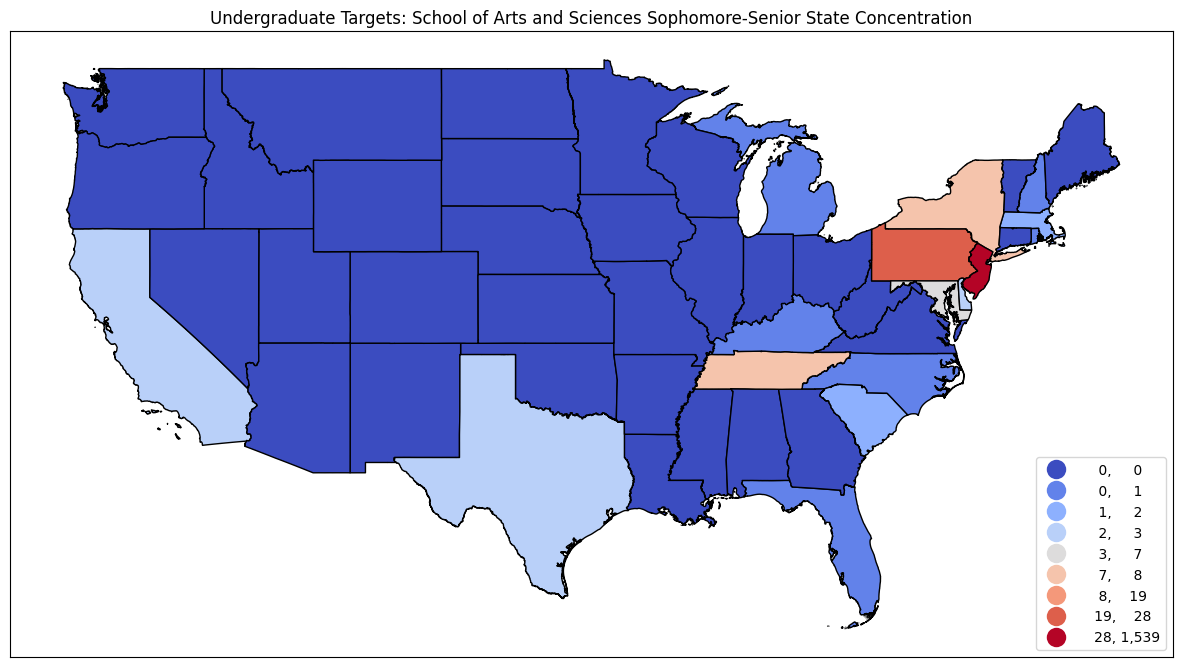

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,50))
USUGMAP.plot(ax=ax,column='Total',legend=True,cmap='coolwarm',
          scheme='natural_breaks',k=9, edgecolor='black',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
ax.title.set_text("Undergraduate Targets: School of Arts and Sciences Sophomore-Senior State Concentration")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

In [ ]:
#Merging Lower with UG Data
NJUGMAP2 = pd.merge(NJC,UGNJC, on='MUN_LABEL',how='outer',indicator=True)
NJUGMAP2[['MUN_LABEL','Total','_merge']]

,MUN_LABEL,Total,_merge
0,Cape May Point Borough,NaN,left_only
1,West Cape May Borough,NaN,left_only
2,Cape May City,1.0,both
3,Wildwood Crest Borough,NaN,left_only
4,West Wildwood Borough,NaN,left_only
...,...,...,...
561,Collingswood Borough,14.0,both
562,Camden City,134.0,both
563,Washington Borough,NaN,left_only
564,Franklin Township (Gloucester),2.0,right_only


In [ ]:
#I want the NaNs to be 0, I like the way that looks better
NJUGMAP2['Total'] = NJUGMAP2['Total'].fillna(0)
NJUGMAP2[['MUN_LABEL','Total','_merge']]

,MUN_LABEL,Total,_merge
0,Cape May Point Borough,0.0,left_only
1,West Cape May Borough,0.0,left_only
2,Cape May City,1.0,both
3,Wildwood Crest Borough,0.0,left_only
4,West Wildwood Borough,0.0,left_only
...,...,...,...
561,Collingswood Borough,14.0,both
562,Camden City,134.0,both
563,Washington Borough,0.0,left_only
564,Franklin Township (Gloucester),2.0,right_only


from matplotlib import pyplot as plt
_df_7['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Total'].plot(kind='hist', bins=20, title='Total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='index', y='Total', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Total']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Total')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Total'].plot(kind='line', figsize=(8, 4), title='Total')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

[]

[]

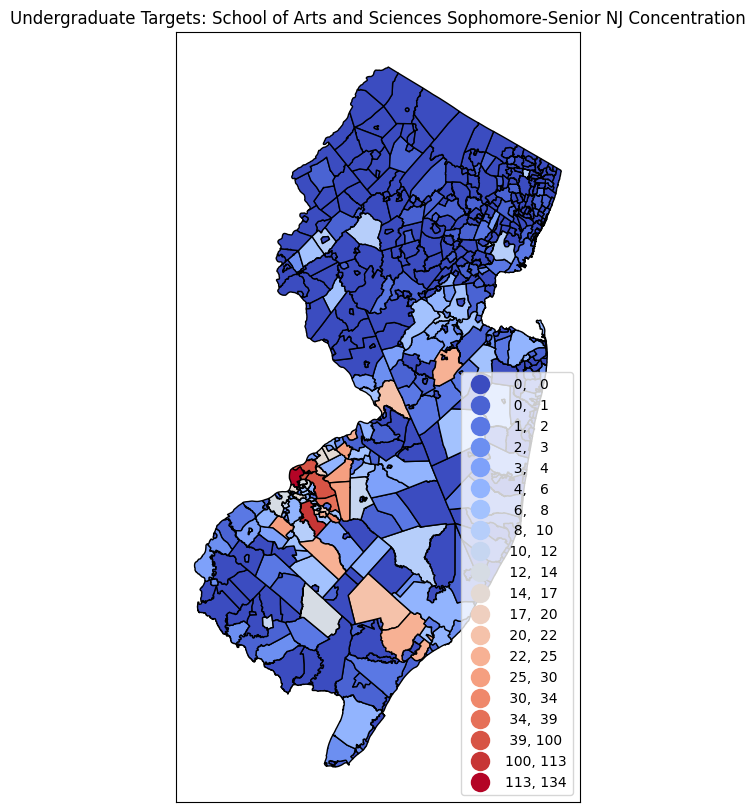

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
NJUGMAP2.plot(ax=ax,column='Total',legend=True,cmap='coolwarm',
          scheme='natural_breaks',k=20, edgecolor='black',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
ax.title.set_text("Undergraduate Targets: School of Arts and Sciences Sophomore-Senior NJ Concentration")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

# Maps

## World Maps
Since the Graduate School's catchment area is global, I want to experiment with maps displaying political boundaries worldwide. Below are two maps with different upload styles. The first is less detailed than the second, which involves downloading from a zip file rather than directly to a shapefile.

In [ ]:
Countries=gpd.read_file('/content/WB_countries_Admin0_10m/WB_countries_Admin0_10m.shp')

<Axes: >

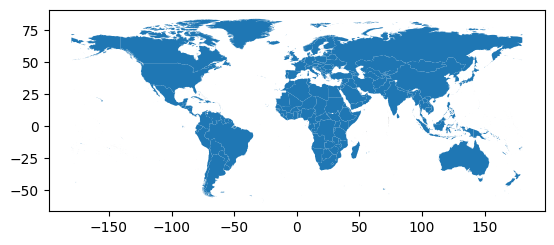

In [ ]:
Countries.plot()

In [ ]:
Countries.head()

,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,...,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
0,1,Admin-0 country,2,Sovereign country,Republic of Indonesia,None,260580739,17,3028000.0,2017,...,Indonesien,Endonezya,Indonesia,印度尼西亚,Indonesia,None,EAP,495.029918,153.078608,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,2,Admin-0 country,2,Sovereign country,Malaysia,None,31381992,15,863000.0,2017,...,Malaysia,Malezya,Malaysia,马来西亚,Malaysia,None,EAP,68.456913,26.703172,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,3,Admin-0 country,2,Sovereign country,Republic of Chile,None,17789267,14,436100.0,2017,...,Chile,Şili,Chile,智利,Chile,None,LCR,416.997272,76.761813,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,4,Admin-0 country,2,Sovereign country,Plurinational State of Bolivia,None,11138234,14,78350.0,2017,...,Bolivia,Bolivya,Bolivia,玻利維亞,Bolivia,None,LCR,54.345991,92.203587,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,5,Admin-0 country,2,Sovereign country,Republic of Peru,None,31036656,15,410400.0,2017,...,Peru,Peru,Peru,秘鲁,Peru,None,LCR,73.262192,106.417089,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [ ]:
print(Countries.WB_NAME.unique())

['Indonesia' 'Malaysia' 'Chile' 'Bolivia' 'Peru' 'Argentina' 'Cyprus'
 'India' 'China' 'Israel' 'West Bank and Gaza' 'Lebanon' 'Ethiopia'
 'South Sudan' 'Somalia' 'Kenya' 'Pakistan' 'Malawi' 'Tanzania'
 'Syrian Arab Republic' 'France' 'Suriname' 'Guyana' 'Korea, Republic of'
 "Korea, Democratic People's Republic of" 'Morocco' 'Costa Rica'
 'Nicaragua' 'Congo, Rep. of' 'Congo, Democratic Republic of' 'Bhutan'
 'Ukraine' 'Belarus' 'Namibia' 'South Africa' 'Saint-Martin (Fr.)'
 'Sint Maarten (Neth.)' 'Oman' 'Uzbekistan' 'Kazakhstan' 'Tajikistan'
 'Lithuania' 'Brazil' 'Uruguay' 'Mongolia' 'Russian Federation'
 'Czech Republic' 'Germany' 'Estonia' 'Latvia' 'Norway' 'Sweden' 'Finland'
 'Vietnam' 'Cambodia' 'Luxembourg' 'United Arab Emirates' 'Belgium'
 'Georgia' 'North Macedonia' 'Albania' 'Azerbaijan' 'Kosovo' 'Turkey'
 'Spain' "Lao People's Democratic Republic" 'Kyrgyz Republic' 'Armenia'
 'Denmark' 'Libya' 'Tunisia' 'Romania' 'Hungary' 'Slovak Republic'
 'Poland' 'Ireland' 'United Kingdom

In [ ]:
#Merging Lower with UG Data
WGMAP2 = pd.merge(GradCountries,Countries, on='WB_NAME',how='outer',indicator=True)
WGMAP2 [['WB_NAME','Admit','Admit Coming','Total','_merge']]

,WB_NAME,Admit,Admit Coming,Total,_merge
0,Algeria,0.0,0.0,1.0,both
1,Australia,0.0,0.0,2.0,both
2,Austria,0.0,0.0,1.0,both
3,Bangladesh,18.0,7.0,34.0,both
4,Belarus,0.0,0.0,2.0,both
...,...,...,...,...,...
246,Navassa Island (US),NaN,NaN,NaN,right_only
247,Palmyra Atoll (US),NaN,NaN,NaN,right_only
248,Kingman Reef (US),NaN,NaN,NaN,right_only
249,Tokelau (NZ),NaN,NaN,NaN,right_only


AttributeError: Line2D.set() got an unexpected keyword argument 'scheme'

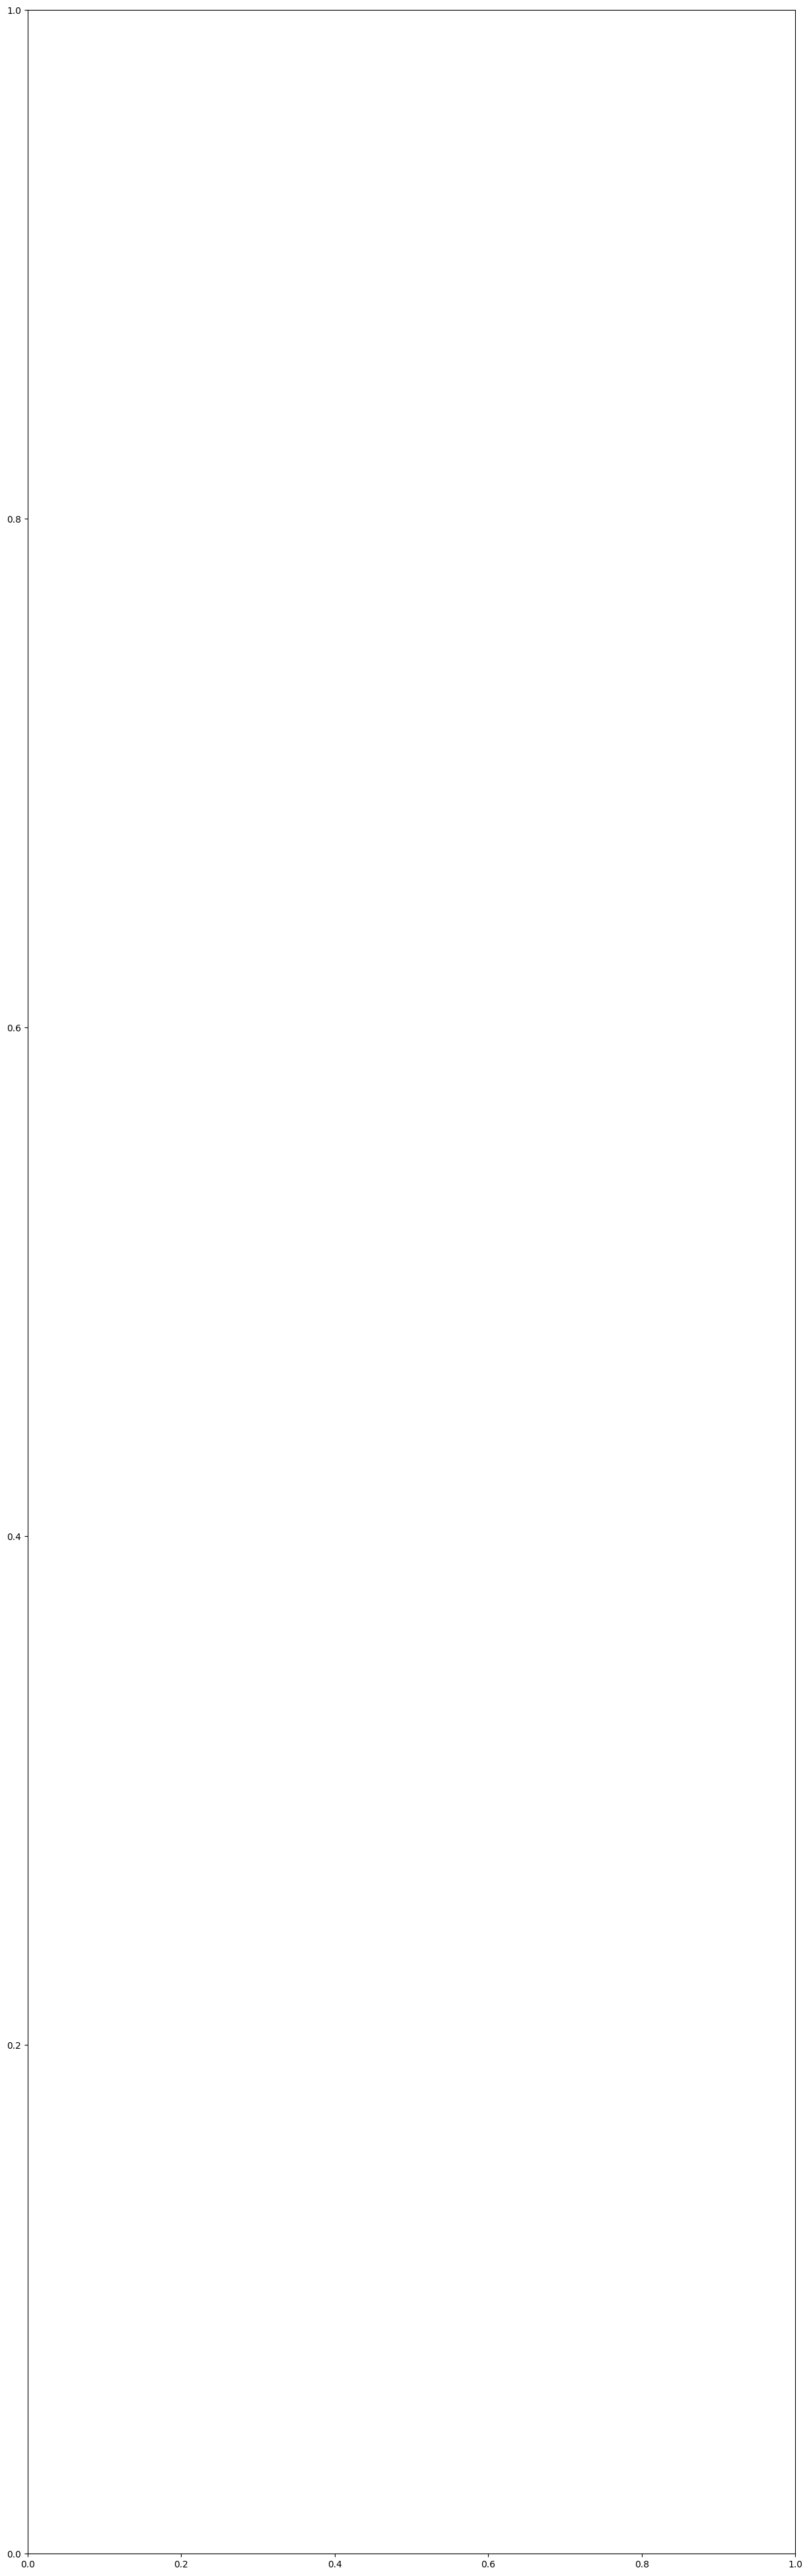

In [272]:
fig, ax = plt.subplots(1, figsize=(15,50))
WGMAP2.plot(ax=ax,column='Admit',legend=True,cmap='coolwarm',
          scheme='natural_breaks',k=9, edgecolor='black',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
ax.title.set_text("Undergraduate Targets: School of Arts and Sciences Sophomore-Senior State Concentration")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

## US Maps
Here I wanted to look at US maps.

### US Map with States

In [ ]:
US=gpd.read_file('/content/cb_2018_us_state_500k.shp')

<Axes: >

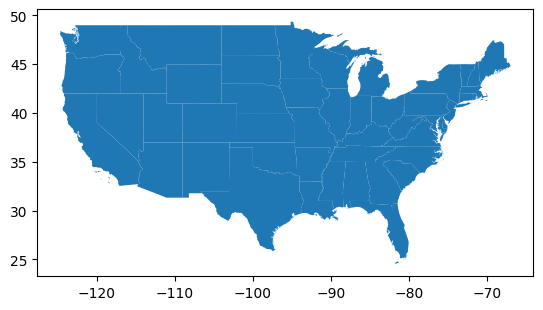

In [ ]:
# I just want the lower 48 since we don't have students in states like Alaska
lower = US[~US['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico','American Samoa','United States Virgin Islands','Guam','Commonwealth of the Northern Mariana Islands'])]
lower.plot()

<Axes: >

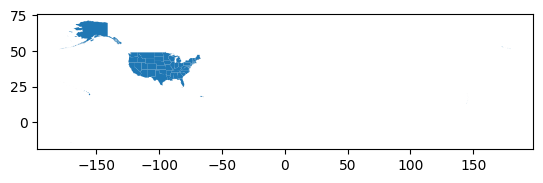

In [ ]:
US.plot()

### US Map with Universities
Here I just wanted to find some data that wasn't just boundaries like all the other plots. This plots all the universities in the US. I manipulated the plot size a bit but I don't think the data is useful other than to show that there are a large number of universities in the US.

In [ ]:
Uni=gpd.read_file('https://data.opendatasoft.com/api/explore/v2.1/catalog/datasets/us-colleges-and-universities@public/exports/shp')

<Axes: >

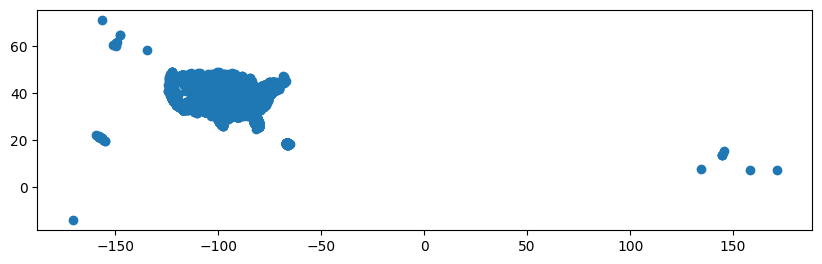

In [ ]:
fig, ax = plt.subplots(figsize=(10, 50))
Uni.plot(ax=ax)

### PA Universities
The previous map is unusable, so I want to look at a smaller geography. Since the map file has NJ, I will look at universities in PA.

Despite a lack of political boundaries, it is clear there are a large number of universities in the Philadelphia area. Not surprising but interesting to see visually.

In [ ]:
PA_Uni=gpd.read_file('https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/us-colleges-and-universities/exports/shp?lang=en&refine=state%3A%22PA%22&timezone=America%2FNew_York')

<Axes: >

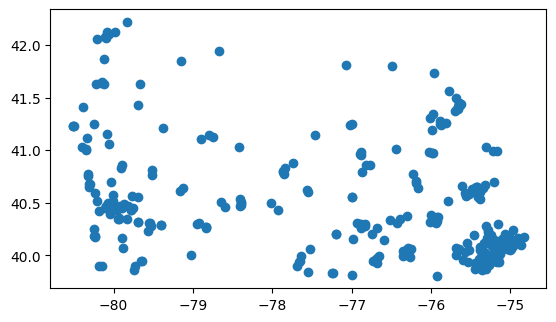

In [ ]:
PA_Uni.plot()

In [ ]:
Philly_Uni=gpd.read_file('https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/us-colleges-and-universities/exports/shp?lang=en&refine=state%3A%22PA%22&refine=city%3A%22PHILADELPHIA%22&timezone=America%2FNew_York')

#### Philadelpha Universities
I decided to plot just the universities in Philadelphia county. I am not sure how useful this is by itself.

However, this exercise is interesting because I often compare Philadelpha university competition against Idaho anecdotally and it's not an unfair comparison. There are 36 schools in Phiadelpha county but only 41 universities in the entire state of Idaho. In the future, I am interested in visualizing this comparison in a useful way.

<Axes: >

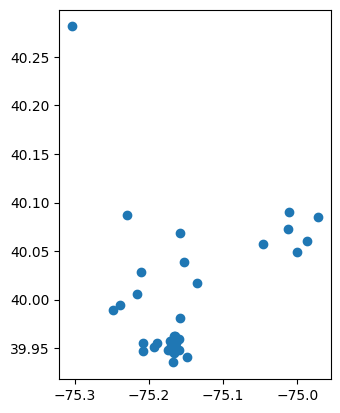

In [ ]:
Philly_Uni.plot()